# CSCI 3022 Homework - Project Part 3

## NAME = "hiim9551"


In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [23]:
df = pd.read_csv('bank-additional-full.csv')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

## Project topic
The goal of this project is to examine if any attributes of bank client demographics show strong correlation with the results of successful bank marketing campaign, which was to convince customers to subscribe the bank term deposit by soliciting them with phone calls. 
While the approach of phone marketing sounds a bit old-fashioned way nowadays, I am motivated to identify certain attributes of customers who tend to be convinced by this bank marketing campaign so that such data can be applied when targeting customers via online advertising. The type of this problem is classification.  

## Data source
The data I am going to use is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The data shows you 20 attributes related to customers and social / economic index and whether customers subscribed the bank term deposit.  

It is sourced from "Bank Marketing Data Set" at UCI Machine Learning Repository page as follows: 
* https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Size of data: data sample size is 41188, number of columns is 20 and bytesize is 5699KB.  

Data type: each feature can be categorized into 4 areas: 1) bank client data, 2) related with the last contact of the current campaign, 3) other attributes and 4) social and economic context attributes. 

There are 10 numeric attributes and 10 categorical attributes.  Some key features include: basic client data (such as age, job, marital status, education, default history, housing loan, personal loan), information related with the last contact of the current campaign (such as contact communication type (cellular phone or home phone), month of contact, day of week of contact, duration of contact), other attributes (such as outcome of the previous marketing campaign) and some economic index (such as employment rate, CPI, EURIBOR). The data is multi-table form.  

## Data cleaning and EDA

I will drop features in 2) related with the last contact of the current campaign, 3) other attributes, and 4) social and economic context attributes, because the goal of this project is to examine the relations between bank client demographics and the result of purchases and thus the features in 2), 3) and 4) are not relevant. 

df below shows you the data frame which include 1) bank client data only.  

In [24]:
df = pd.DataFrame(data = df, columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y'])
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         y  
0       no  
1       no  
2       no  

## Checking the relations of purchases and certain attributes

For Part 1, I focused on relations between the results of purchases and certain attributes which intuitively seem to be important, such as job, education and housing loan.  I analysed these by counting the number of purchase behavior classified by these attributes and visualized the results with histogram to examine if I could identify certain trend from these attributes.  

For Part 2, I visualized the ratio between "yes" (those who purchased)  and "no" (those who did not) for more precise analysis. I also added a numeric attribute (i.e., age) to examine if there is noteworthy trends from that.  

Details of these attributes are shown below: 
* age: age
* job : type of job -- 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'
* education: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
* housing: has housing loan?  -- 'no','yes','unknown'

Those who purcahsed the bank term deposit responds "yes" and are shown in orange in the histogram.  

age  y  
17   no      3
     yes     2
18   no     16
     yes    12
19   no     22
            ..
92   no      1
     yes     3
94   no      1
95   no      1
98   yes     2
Name: job, Length: 150, dtype: int64


<AxesSubplot:xlabel='age'>

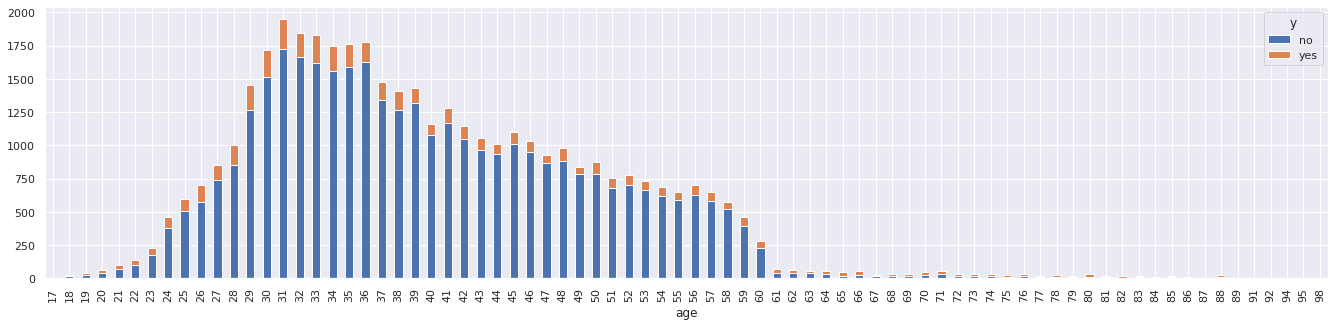

In [25]:
df_a = df.groupby(['age', 'y']).count().job
print(df_a)
df_a.unstack().plot(kind='bar', stacked=True, figsize=(23,5))

age  y  
17   no     0.600000
     yes    0.400000
18   no     0.571429
     yes    0.428571
19   no     0.523810
              ...   
92   no     0.250000
     yes    0.750000
94   no     1.000000
95   no     1.000000
98   yes    1.000000
Name: job, Length: 150, dtype: float64


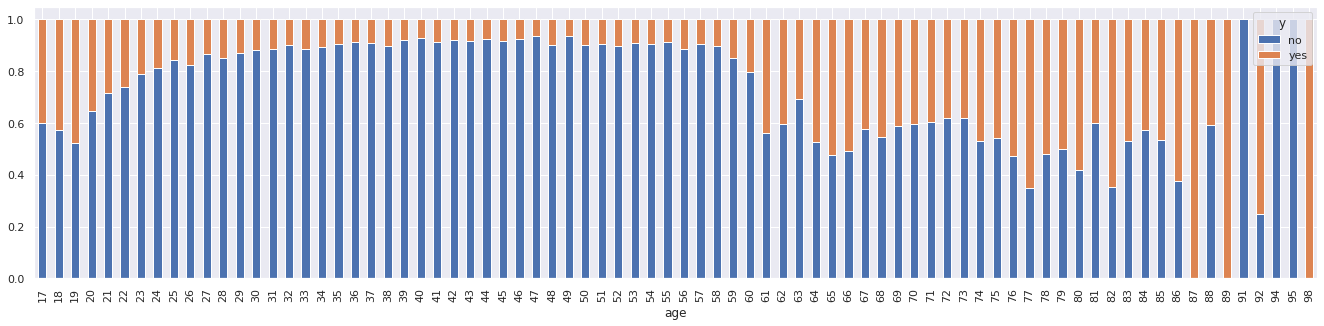

In [26]:
prob_a = df_a / df_a.sum(level='age')
print(prob_a)
prob_a.unstack().plot(kind='bar', stacked=True, figsize=(23,5));

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: age, dtype: int64


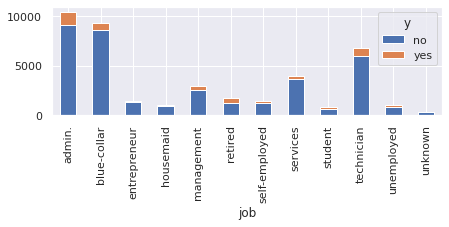

In [27]:
df_j = df.groupby(['job', 'y']).count().age
print(df_j)
df_j.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

job            y  
admin.         no     0.870274
               yes    0.129726
blue-collar    no     0.931057
               yes    0.068943
entrepreneur   no     0.914835
               yes    0.085165
housemaid      no     0.900000
               yes    0.100000
management     no     0.887825
               yes    0.112175
retired        no     0.747674
               yes    0.252326
self-employed  no     0.895144
               yes    0.104856
services       no     0.918619
               yes    0.081381
student        no     0.685714
               yes    0.314286
technician     no     0.891740
               yes    0.108260
unemployed     no     0.857988
               yes    0.142012
unknown        no     0.887879
               yes    0.112121
Name: age, dtype: float64


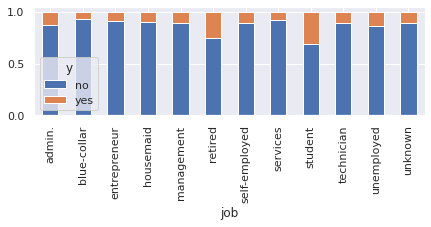

In [28]:
prob_j = df_j / df_j.sum(level='job')
print(prob_j)
prob_j.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: age, dtype: int64


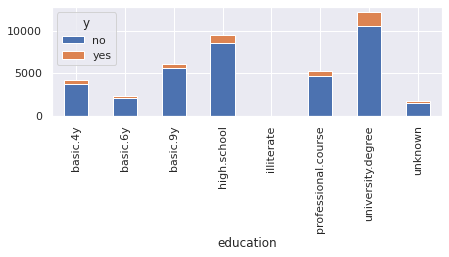

In [29]:
df_e = df.groupby(['education', 'y']).count().age
print(df_e)
df_e.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

education            y  
basic.4y             no     0.897510
                     yes    0.102490
basic.6y             no     0.917976
                     yes    0.082024
basic.9y             no     0.921754
                     yes    0.078246
high.school          no     0.891645
                     yes    0.108355
illiterate           no     0.777778
                     yes    0.222222
professional.course  no     0.886515
                     yes    0.113485
university.degree    no     0.862755
                     yes    0.137245
unknown              no     0.854997
                     yes    0.145003
Name: age, dtype: float64


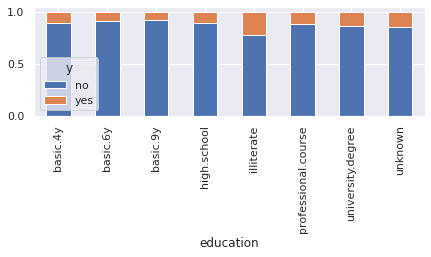

In [30]:
prob_e = df_e / df_e.sum(level='education')
print(prob_e)
prob_e.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

housing  y  
no       no     16596
         yes     2026
unknown  no       883
         yes      107
yes      no     19069
         yes     2507
Name: age, dtype: int64


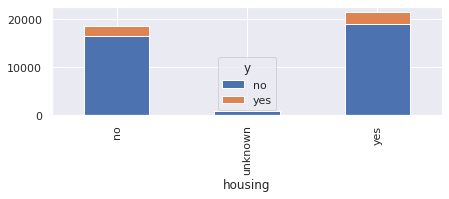

In [31]:
df_h = df.groupby(['housing', 'y']).count().age
print(df_h)
df_h.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

housing  y  
no       no     0.891204
         yes    0.108796
unknown  no     0.891919
         yes    0.108081
yes      no     0.883806
         yes    0.116194
Name: age, dtype: float64


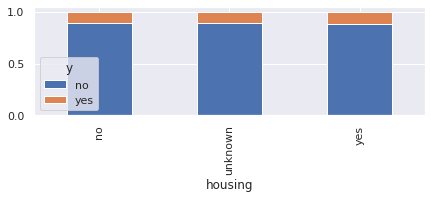

In [32]:
prob_h = df_h / df_h.sum(level='housing')
print(prob_h)
prob_h.unstack().plot(kind='bar', stacked=True, figsize=(7,2));

## EDA Summary
As can be seen from the above, there are certain attributes that show orange ('yes') more, which would indicate that client tends to purchase the bank product based on telemarketing.  Specifically, from age demographics, those who are at the age above 60 or below 20 years old show tendency to purchase the bank product.  Other attributes which show the similar tendency include those who are admin, retired or student from jobs demographics as well as those who are illiterate or completed university degree or professional course from education.  Whether or not to have housing loan does not indicate significant difference.

The difficulties in analyzing these data is that there are not enough sample size for those who show significantly higher ratio of 'yes' (such as the age above 60, or those who are illiterate). Indeed, if you look at the first histogram of age demographics, it can be found that most of the customers who were reached out by the bank are from 20s to 50s. As such, the significant trends from limited sample size may not be useful for analysis.  Furthermore, as the age is the only numeric attribute from dataset and other attributes are categorical with multiple possible values, not with binary outcome, this may create additional difficulties in building a model at Part 3 of the Project. 

## Plans for model approach

As mentioned in the beginning, this is a classification problem.  Hence, I plan to try the multiclass logistic regression or discriminate analysis model for Part 3 of the project.  The reason is that most attributes of bank client data are not based on binary outcome, but rather, there are multiple possible values in the response variable.  If I try the linear regression model with the available dataset, then the regression will not do a good job as a classifier because most attributes are not based on binary outcome.  

## Multiclass Logistic Models
In part 3, I will build the logistic classification model that maximizes the accuracy of predicting whether a bank customer purchases bank term deposits based on phone marketing.  For comparison, I will also use the K-Nearest Neighbors classification method to predict whether a bank customer purchases.  Both models will also show the prediction accuracy. 

In [33]:
print(df.columns)
print(df.dtypes)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'y'],
      dtype='object')
age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
y            object
dtype: object


In [34]:
df['y_bool'] = (df.y == 'yes').astype(int) # yes is 1.  
# First, I build the model which includes all columns for bank client demographics
y,X = patsy.dmatrices("y_bool ~ age + job + marital + education + default + housing + loan", data=df, return_type='dataframe')  

# Next, I use the even data elements for training set and the odd data elements for the testing set. 
#As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  

logistic_classificatin_model = sklearn.linear_model.LogisticRegression()
y_model = logistic_classificatin_model.fit(X[::2],np.ravel(y[::2]))
print(y_model.coef_, y_model.intercept_)
y_pred = y_model.predict(X[1::2])
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y[1::2], y_pred)
print(cm)  # The confusion matrix shows that all responses predict "No"

accuracy = y_model.score(X[1::2], y[1::2])
print(accuracy) #The accuracy of prediction is: 0.8870059240555501

[[-1.24223045 -0.36295699 -0.3147397   0.04732697 -0.09515958  0.86936435
  -0.26530765 -0.2959791   1.01453322 -0.1434724   0.32832389  0.28212708
   0.09384075  0.38802022  0.33798143 -0.01188352 -0.16464647 -0.08540052
  -0.12652119 -0.0441371   0.13090497  0.27535006 -0.97056952 -0.03159336
  -0.11060173  0.06132639 -0.11060173 -0.02408578  0.01368715]] [-1.39871261]
[0. 0. 0. ... 0. 0. 0.]
[[18267     0]
 [ 2327     0]]
0.8870059240555501


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Results, Analysis and Discussion
As can be seen from the confusion matrix above, when the model considers all attributes, the model predicts that all responses are "No (not buy)" with the accuracy rate of 0.8870059240555501.  I assumed this would be because the ratio of "Yes (buy)" is so small, the model would just predict all "No (not buy)", although there are actually 2327 "Yes (buy)".  But it is not ideal if the model just predicts all customers don't buy the bank product due to the fact that the number of customers who purchased was very small. 

I looked back the anaylsis for "age" made in Project 2, which shows the tendency that younger and older generations buy the bank product than the generations in the middle. Under such circumstance, I assumed that polynomial regression would fit better than a simple linear regression.  Hence, to resolve the issue above, I went back to the first model to try building polynomial regression for "age" demographics.  The result is shown below: 

In [35]:
df['y_bool'] = (df.y == 'yes').astype(int) # yes is 1.  
# Second, I build the model which includes all columns for bank client demographics with polynomial regression for age demographics
y,X = patsy.dmatrices("y_bool ~ age + np.power(age, 2) + job + marital + education + default + housing + loan", data=df, return_type='dataframe')  

# I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  

logistic_classificatin_model = sklearn.linear_model.LogisticRegression()
y_model = logistic_classificatin_model.fit(X[::2],np.ravel(y[::2]))
print(y_model.coef_, y_model.intercept_)
y_pred = y_model.predict(X[1::2])
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y[1::2], y_pred)
print(cm)  # Unlike the result above, the confusion matrix includes some responses predict "Yes"

accuracy = y_model.score(X[1::2], y[1::2])
print(accuracy) #The accuracy of prediction is: 0.8874429445469554

[[ 0.15409758 -0.3324784  -0.13152541 -0.00392909 -0.05688583  0.26169714
  -0.1305124  -0.29396829  0.48279525 -0.14610198  0.17734587  0.0479792
   0.10625376  0.31464789  0.02801567 -0.00612308 -0.13207948 -0.00904855
  -0.00782609  0.03137787  0.13004095  0.24915247 -0.99926918 -0.00199698
  -0.06206924  0.05659184 -0.06206924 -0.02266223 -0.12730308  0.00157569]] [0.15466322]
[0. 0. 0. ... 0. 0. 0.]
[[18217    50]
 [ 2268    59]]
0.8874429445469554


## Results, Analysis and Discussion
As can be seen from the confusion matrix above, compared to the first model, the second model improved in that the confusion matrix shows some responses are predicted to be "Yes (buy)" with a slightly better accuracy rate of 0.8874429445469554. 

Then I reiterated the model several times to examine which model would maximize the accuracy rate.  The results are shown below: 
* If job reduced, the accuracy of prediction is: 0.8873458288821987
* If job + marital reduced: 0.887394386714577
* If job + marital + education reduced: 0.887394386714577
* If job + marital + education + default reduced: 0.8870544818879286
* If housing reduced: 0.8875886180440905
* If housing + default reduced: 0.887394386714577
* If housing + default + loan reduced: 0.8873458288821987
* If housing + loan reduced: 0.8875886180440905

In [36]:
df['y_bool'] = (df.y == 'yes').astype(int) # yes is 1.  
y,X = patsy.dmatrices("y_bool ~ age + np.power(age, 2) + job + marital + education + default", data=df, return_type='dataframe')  
# If job reduced, the accuracy of prediction is: 0.8873458288821987
# If job + marital reduced: 0.887394386714577
# If job + marital + education reduced: 0.887394386714577
# If job + marital + education + default reduced: 0.8870544818879286
# If housing reduced: 0.8875886180440905
# If housing + default reduced: 0.887394386714577
# If housing + default + loan reduced: 0.8873458288821987
# If housing + loan reduced: 0.8875886180440905
#print(y, X)

# I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  

logistic_classificatin_model = sklearn.linear_model.LogisticRegression()
y_model = logistic_classificatin_model.fit(X[::2],np.ravel(y[::2]))
print(y_model.coef_, y_model.intercept_)
y_pred = y_model.predict(X[1::2])
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y[1::2], y_pred)
print(cm)

accuracy = y_model.score(X[1::2], y[1::2])
print(accuracy) #The accuracy of prediction is: 0.8875886180440905

[[ 0.12194269 -0.38439787 -0.08035037 -0.00511209 -0.00627652  0.21114874
  -0.07986935 -0.22637349  0.34437995 -0.09243724  0.12488365  0.02935776
   0.12295958  0.21777128  0.01663007 -0.03543103 -0.17359641  0.00588607
  -0.00502049  0.02492854  0.24655761  0.16881555 -0.93934763 -0.00120179
  -0.12406327  0.00153738]] [0.12212859]
[0. 0. 0. ... 0. 0. 0.]
[[18222    45]
 [ 2270    57]]
0.8875886180440905


## Summary of Results and Analysis for the logistic classification model
Considering the above results, it comes to the conclusion that removing "housing" and "loan" show the maximum accuracy rate for the model.  In other words, the model should use "age" (polynomial regression), "job", "marital", "education" and "default" for prediction.  Indeed, this corresponds to the EDA Summary under Project 1 and Project 2 that whether or not to have housing loan does not indicate significant difference.  

## KNN Model
Next, I use the K-Nearest Neighbors classification method to predict whether the bank customer purchases the bank product based on phone marketing.  I also attempt to find the smallest K that maximizes the accuracy. 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Again I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  
# First, I try with K = 1
neigh = KNeighborsClassifier(n_neighbors=1, weights = 'uniform') 
neigh.fit(X[::2],np.ravel(y[::2]))
y_knn_pred = neigh.predict(X[1::2])
print(y_knn_pred)

score = neigh.score(X[1::2], np.ravel(y[1::2]))
print(score) # 0.8286394095367583 (K = 1)

[0. 1. 0. ... 1. 0. 0.]
0.8286394095367583


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Again I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  
# Second, I try with K = 2

neigh = KNeighborsClassifier(n_neighbors=2, weights = 'uniform')
neigh.fit(X[::2],np.ravel(y[::2]))
y_knn_pred = neigh.predict(X[1::2])
print(y_knn_pred)

score = neigh.score(X[1::2], np.ravel(y[1::2]))
print(score) # 0.8776828202389045 (K = 2)

[0. 0. 0. ... 0. 0. 0.]
0.8776828202389045


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Again I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  
# Third, I try with K = 3

neigh = KNeighborsClassifier(n_neighbors=3, weights = 'uniform')
neigh.fit(X[::2],np.ravel(y[::2]))
y_knn_pred = neigh.predict(X[1::2])
print(y_knn_pred)

score = neigh.score(X[1::2], np.ravel(y[1::2]))
print(score) # 0.868116927260367 (K = 3)

[0. 0. 0. ... 1. 1. 0.]
0.868116927260367


In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Again I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  
# Forth, I try with K = 4
neigh = KNeighborsClassifier(n_neighbors=4, weights = 'uniform')
neigh.fit(X[::2],np.ravel(y[::2]))
y_knn_pred = neigh.predict(X[1::2])
print(y_knn_pred)

score = neigh.score(X[1::2], np.ravel(y[1::2]))
print(score) # 0.8836068757890648 (K = 4)

[0. 0. 0. ... 1. 1. 0.]
0.8836068757890648


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Again I use the even data elements for training set and the odd data elements for the testing set. As such, train_set = y[::2], X[::2] and test_set = y[1::2], X[1::2].  
# Lastly, I try with K = 5
neigh = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
neigh.fit(X[::2],np.ravel(y[::2]))
y_knn_pred = neigh.predict(X[1::2])
print(y_knn_pred)

score = neigh.score(X[1::2], np.ravel(y[1::2]))
print(score) # 0.8808390793434981 (K = 5)
print("The smallest K that maximizes the accuracy is: K = 4")

[0. 0. 0. ... 1. 1. 0.]
0.8808390793434981
The smallest K that maximizes the accuracy is: K = 4


## Summary of results and analysis for KNN Model and comparison 
I iterated from K = 1 to K = 5 and conclude that the smallest K that maximizes the accuracy rate is K = 4, which shows the accuracy rate of 0.8836068757890648. 

While the logistic classification model makes it easier for me to infer which attributes are statistically significant and also works well with large datasets, the KNN method does not require training step and very easy to implement for multi-class problems. Both approaches achieved high accuracy rates of more than 0.88, but the KNN technique would be better tool when interested in prediction. 

## Write-up
The goal of this project is to examine which attributes of bank client demographics show strong correlation with the results of successful bank marketing campaign, which was to convince customers to subscribe the bank term deposit by soliciting them with phone calls. 

While the dataset showed some challenge that most of the responses were "No (not buy)", and the sample size for those who responded "Yes (buy)" were limited, I improved the initial model by using polynomial model for certain attributes.  

In conclusion, by looking at the logistic classification model, it is considered that the attributes of bank client demographics which show correlation with the successful bank marketing are: "age", "job", "marital", "education" and "default".  Indeed, this conclusion is supported by the EDA Summary under Project 1 and Project 2.  
The KNN model suggests that the smallest K that maximizes the accuracy rate for prediction is when K = 4.  